In [1]:
import os
import torch
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, models

import sys
sys.path.append('../src/data')
sys.path.append('..')

from datasets import CelebaDataset
import landmark_transforms
import torch.optim as optim

In [2]:
data_loc = '/home/data/celeba/'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
dataset = CelebaDataset(data_loc + 'list_landmarks_celeba.txt', data_loc + 'list_attr_celeba.txt', data_loc + 'images',
                        transform=transforms.Compose([
                            transforms.ToTensor(), 
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                        ]), 
                        landmark_transform=transforms.Compose([
                            landmark_transforms.Rescale(224),
                            landmark_transforms.NormalizeLandmarks()
                        ]))

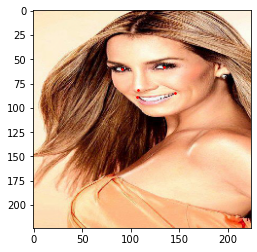

In [4]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(transforms.ToPILImage()(image))
    plt.scatter(landmarks[:, 0] * image.shape[-1], landmarks[:, 1] * image.shape[-2], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
sample = dataset[10]
show_landmarks(sample['image'], sample['landmarks'])
plt.show()

In [ ]:
fig = plt.figure()

for i in range(len(dataset)):
    sample = dataset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(sample['image'], sample['landmarks'])

    if i == 3:
        plt.show()
        break

In [ ]:
num_classes = 10

resnet18 = models.resnet18(pretrained=True, num_classes=num_classes).to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer_args = {
    'lr': 1e-4,
    'weight_decay': 0,
}
optimizer = optim.Adam(optimizer_args)

num_epochs = 5
net = resnet18

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0